<a href="https://colab.research.google.com/github/anikch/Classifying_images_from_MNIST_Fashion_Dataset/blob/main/Classifying_images_from_MNIST_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Check tensorflow version
print(tf.__version__)

2.6.0


## Loading and checking data

In [ ]:
# Loading fashion_mnist dataset
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

# Checking shape of train test dataset
X_train.shape, X_test.shape, y_test.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

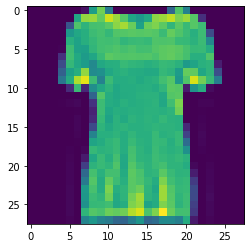

In [ ]:
# Checking arbitary image
plt.imshow(X_train[10,:,:])

## Data pre-processing

In [ ]:
# Converting data into float32 to use 32-bit precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
# Normalizing data (actual value - min / max - min)
# Pixel value ranges between 0-255
X_train_norm=  X_train/ 255.0
X_test_norm= X_test/255.0

In [ ]:
# Reshaping data
X_train_norm= X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_norm= X_test_norm.reshape(X_test_norm.shape[0], -1)

# Checking final shape
X_train_norm.shape, X_test_norm.shape

((60000, 784), (10000, 784))

In [ ]:
# Checking unique categories in y_test and y_train
np.unique(y_train), np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
# Performing One-hot encoding of 10 labels
y_train_cat= tf.keras.utils.to_categorical(y_train, 10) 
y_test_cat= tf.keras.utils.to_categorical(y_test, 10)

## Model Building and Evaluation

### 1. Building Perceptron with softmax activation and SGD optimizer

In [ ]:
# Building Perceptron with softmax activation and SGD optimizer
tf.random.set_seed(42)
model= tf.keras.Sequential(name= 'perceptron_1')
model.add(tf.keras.layers.Dense(10, input_shape= (X_train_norm.shape[1],), activation= 'softmax', name= 'dense_layer1'))

# Compiling the model
model.compile(optimizer= 'sgd', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history= model.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 3s 3ms/step - loss: 1.2154 - accuracy: 0.6335 - val_loss: 0.8956 - val_accuracy: 0.7179
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.8232 - accuracy: 0.7369 - val_loss: 0.7580 - val_accuracy: 0.7579
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.7292 - accuracy: 0.7685 - val_loss: 0.6932 - val_accuracy: 0.7783
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.7836 - val_loss: 0.6544 - val_accuracy: 0.7896
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6447 - accuracy: 0.7947 - val_loss: 0.6270 - val_accuracy: 0.7962
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6203 - accuracy: 0.8009 - val_loss: 0.6067 - val_accuracy: 0.8019
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.8070 - val_loss: 0.5907 - val_accuracy: 0.8065

In [ ]:
# Checking model summary
model.summary()

Model: "perceptron_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.8375


[0.4632628560066223, 0.8374999761581421]

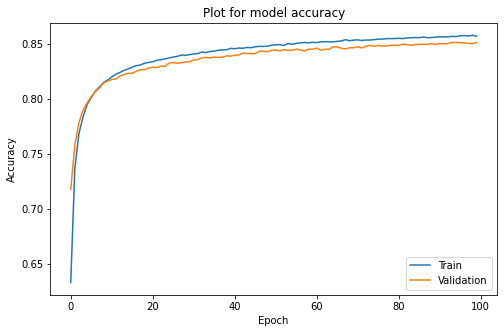

In [ ]:
# Plotting accuracy for different epochs
plt.figure(figsize= [8,5])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Plot for model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

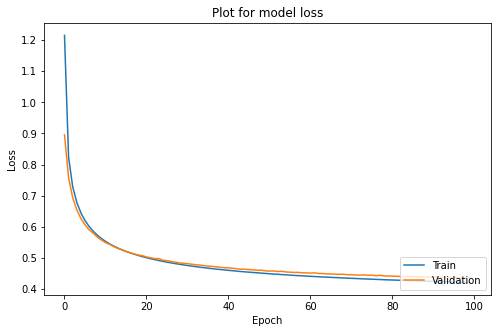

In [ ]:
# Plotting loss for different epochs
plt.figure(figsize= [8,5])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot for model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

Using perceptron we have got testing accuracy of .84 and training accuracy of .86. Now, let's check with a Multilayer Perceptron with one hidden layer.

### 2. Building model with one hidden layer of 128 neurons

In [ ]:
# Building model with one hidden layer of 128 neurons
tf.random.set_seed(42)
model1= tf.keras.Sequential(name= 'mlp_1')
model1.add(tf.keras.layers.Dense(128, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model1.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer2'))

# Compiling the model
model1.compile(optimizer= 'sgd', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history1= model1.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 1.1473 - accuracy: 0.6556 - val_loss: 0.8069 - val_accuracy: 0.7442
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7310 - accuracy: 0.7668 - val_loss: 0.6702 - val_accuracy: 0.7828
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6366 - accuracy: 0.7946 - val_loss: 0.6068 - val_accuracy: 0.7999
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5870 - accuracy: 0.8082 - val_loss: 0.5696 - val_accuracy: 0.8120
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5546 - accuracy: 0.8171 - val_loss: 0.5469 - val_accuracy: 0.8173
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5317 - accuracy: 0.8229 - val_loss: 0.5241 - val_accuracy: 0.8242
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5137 - accuracy: 0.8282 - val_loss: 0.5107 - val_accuracy: 0.8262

In [ ]:
# Checking model summary
model1.summary()

Model: "mlp_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 128)               100480    
_________________________________________________________________
dense_layer2 (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model1.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8684


[0.3721666634082794, 0.868399977684021]

Validation and testing accuracy both have increased and both losses have decreased from our previous model.

### 3. Building Multi-layer Perceptron with Dropout Normalization

In [ ]:
# Building Multi-layer Perceptron with Dropout Normalization
tf.random.set_seed(42)
model2= tf.keras.Sequential(name= 'mlp_2')
model2.add(tf.keras.layers.Dense(128, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model2.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer1'))
model2.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer2'))

# Compiling the model
model2.compile(optimizer= 'sgd', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history2= model2.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 1.2609 - accuracy: 0.5895 - val_loss: 0.8416 - val_accuracy: 0.7333
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.8404 - accuracy: 0.7224 - val_loss: 0.6998 - val_accuracy: 0.7773
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7376 - accuracy: 0.7543 - val_loss: 0.6372 - val_accuracy: 0.7917
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6769 - accuracy: 0.7742 - val_loss: 0.5965 - val_accuracy: 0.8058
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6354 - accuracy: 0.7865 - val_loss: 0.5679 - val_accuracy: 0.8127
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6091 - accuracy: 0.7959 - val_loss: 0.5482 - val_accuracy: 0.8195
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5862 - accuracy: 0.8056 - val_loss: 0.5312 - val_accuracy: 0.8243

In [ ]:
# Checking model summary
model2.summary()

Model: "mlp_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 128)               100480    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 128)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model2.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8685


[0.3633310794830322, 0.8684999942779541]

Validation and testing accuracy is almost same as our previous MLP model. There is not much change in losses as well. One thing can be noticed, now our model has almost same training, validation and tetsing accuracy.
Let's try to incraese the number of neurons to 256 and check if it improves the model.

### 4. Building Multi-layer Perceptron with Dropout Normalization and increased neurons

In [ ]:
# Building Multi-layer Perceptron with Dropout Normalization and increased neurons
tf.random.set_seed(42)
model3= tf.keras.Sequential(name= 'mlp_3')
model3.add(tf.keras.layers.Dense(256, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model3.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer1'))
model3.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer2'))

# Compiling the model
model3.compile(optimizer= 'sgd', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history3= model3.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 1.2068 - accuracy: 0.6051 - val_loss: 0.8129 - val_accuracy: 0.7318
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7968 - accuracy: 0.7314 - val_loss: 0.6823 - val_accuracy: 0.7768
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.7011 - accuracy: 0.7654 - val_loss: 0.6204 - val_accuracy: 0.7954
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6469 - accuracy: 0.7840 - val_loss: 0.5821 - val_accuracy: 0.8067
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.6106 - accuracy: 0.7960 - val_loss: 0.5552 - val_accuracy: 0.8159
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5825 - accuracy: 0.8031 - val_loss: 0.5341 - val_accuracy: 0.8214
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.5619 - accuracy: 0.8113 - val_loss: 0.5189 - val_accuracy: 0.8259

In [ ]:
# Checking model summary
model3.summary()

Model: "mlp_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 256)               200960    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 256)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model3.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3550 - accuracy: 0.8736


[0.3550010323524475, 0.8736000061035156]

After incraesing number of hidden units, losses have been decreased and training, validation and testing accuracy also increased. Next, I'll try with Adam and RMSprop optimizers to check if that improves the model.

### 5. Building MLP with adam optimizer with all previous configurations

In [ ]:
# Building MLP with adam optimizer with all previous configurations
tf.random.set_seed(42)
model4= tf.keras.Sequential(name= 'mlp_4')
model4.add(tf.keras.layers.Dense(256, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model4.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer1'))
model4.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer2'))

# Compiling the model
model4.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history4= model4.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

375/375 [==============================] - 2s 3ms/step - loss: 0.6187 - accuracy: 0.7827 - val_loss: 0.4447 - val_accuracy: 0.8407
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4324 - accuracy: 0.8460 - val_loss: 0.4154 - val_accuracy: 0.8481
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3867 - accuracy: 0.8585 - val_loss: 0.3786 - val_accuracy: 0.8633
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3621 - accuracy: 0.8683 - val_loss: 0.3515 - val_accuracy: 0.8758
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3431 - accuracy: 0.8745 - val_loss: 0.3496 - val_accuracy: 0.8738
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8786 - val_loss: 0.3296 - val_accuracy: 0.8831
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8832 - val_loss: 0.3401 - val_accuracy: 0.8834
Epoch 8/100

In [ ]:
# Checking model summary
model4.summary()

Model: "mlp_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 64)                50240     
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 64)                0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model4.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.8899


[0.6423174142837524, 0.8899000287055969]

After using RMSprop as optimizer, accuracy improved a in trainng, validation and as well as in testing. But difference between training and testing loss has been increased. Looks like model is started to overfit. Let's check with Adam optimizer, then we'll again address the issue of overfitting.

### 6. Building MLP with adam optimizer with all previous configurations

In [ ]:
# Building MLP with adam optimizer with all previous configurations
tf.random.set_seed(42)
model5= tf.keras.Sequential(name= 'mlp_5')
model5.add(tf.keras.layers.Dense(256, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model5.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer1'))
model5.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer2'))

# Compiling the model
model5.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history5= model5.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.6030 - accuracy: 0.7897 - val_loss: 0.4494 - val_accuracy: 0.8397
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4276 - accuracy: 0.8490 - val_loss: 0.3892 - val_accuracy: 0.8578
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3859 - accuracy: 0.8606 - val_loss: 0.3686 - val_accuracy: 0.8658
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8707 - val_loss: 0.3582 - val_accuracy: 0.8701
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8744 - val_loss: 0.3455 - val_accuracy: 0.8774
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3280 - accuracy: 0.8795 - val_loss: 0.3257 - val_accuracy: 0.8842
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3188 - accuracy: 0.8828 - val_loss: 0.3202 - val_accuracy: 0.8863

In [ ]:
# Checking model summary
model5.summary()

Model: "mlp_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 256)               200960    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 256)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model5.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.4590 - accuracy: 0.8977


[0.45901381969451904, 0.8977000117301941]

With Adam optimizer model performance is slightly better than our previous model. ur testing accuracy is better and loss in testing dataset is smaller than our last model. But still there is some difference in training and testing accuracy, and testing loss is bit higher than training loss. I'll use Adam optimizer and will add one more hidden layer with dropout normalization.

### 7. Building model with adam optimizer and 2 hidden layers

In [ ]:
# Building model with adam optimizer and 2 hidden layers
tf.random.set_seed(42)
model6= tf.keras.Sequential(name= 'mlp_6')
model6.add(tf.keras.layers.Dense(256, input_shape= (X_train_norm.shape[1],), activation= 'relu', name= 'dense_layer1'))
model6.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer1'))
model6.add(tf.keras.layers.Dense(256, activation= 'relu', name= 'dense_layer2'))
model6.add(tf.keras.layers.Dropout(.3, name= 'dropout_layer2'))
model6.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer3'))

# Compiling the model
model6.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model
history6= model6.fit(X_train_norm, y_train_cat, batch_size= 128, epochs= 100, validation_split= .2)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 0.6209 - accuracy: 0.7771 - val_loss: 0.4291 - val_accuracy: 0.8461
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.8425 - val_loss: 0.3878 - val_accuracy: 0.8571
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8568 - val_loss: 0.3650 - val_accuracy: 0.8648
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3719 - accuracy: 0.8648 - val_loss: 0.3538 - val_accuracy: 0.8728
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3544 - accuracy: 0.8705 - val_loss: 0.3364 - val_accuracy: 0.8811
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8755 - val_loss: 0.3277 - val_accuracy: 0.8820
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3294 - accuracy: 0.8792 - val_loss: 0.3284 - val_accuracy: 0.8837

In [ ]:
# Checking model summary
model6.summary()

Model: "mlp_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 256)               200960    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 256)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 256)               65792     
_________________________________________________________________
dropout_layer2 (Dropout)     (None, 256)               0         
_________________________________________________________________
dense_layer3 (Dense)         (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model6.evaluate(X_test_norm, y_test_cat, batch_size= 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.8944


[0.42908379435539246, 0.8944000005722046]

Increasing hidden layers, reduced testing loss. Next, I'll try to reduce batchsize to check if it improves the performance.

### 8. Building model with increased neurons, dropout rate and he initialization for hidden layers

In [ ]:
# Building model with increased neurons, dropout rate and he initialization for hidden layers
tf.random.set_seed(42)
model_7= tf.keras.Sequential(name= 'mlp7')
model_7.add(tf.keras.layers.Dense(392, input_shape= (X_train_norm.shape[1],), kernel_initializer= 'he_normal', activation= 'relu', name= 'dense_layer1'))
model_7.add(tf.keras.layers.Dropout(.5, name= 'dropout_layer1'))
model_7.add(tf.keras.layers.Dense(196, kernel_initializer= 'he_normal', activation= 'relu', name= 'dense_layer2'))
model_7.add(tf.keras.layers.Dropout(.5, name= 'dropout_layer2'))
model_7.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer3'))

# Compiling the model
model_7.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model with lower batch_size
history_7= model_7.fit(X_train_norm, y_train_cat, batch_size= 64, epochs= 100, validation_split= .2)

Epoch 1/100
750/750 [==============================] - 3s 3ms/step - loss: 0.7053 - accuracy: 0.7446 - val_loss: 0.4491 - val_accuracy: 0.8329
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.5061 - accuracy: 0.8179 - val_loss: 0.4173 - val_accuracy: 0.8454
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8315 - val_loss: 0.3861 - val_accuracy: 0.8598
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4375 - accuracy: 0.8439 - val_loss: 0.3656 - val_accuracy: 0.8673
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4204 - accuracy: 0.8479 - val_loss: 0.3689 - val_accuracy: 0.8649
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.4059 - accuracy: 0.8544 - val_loss: 0.3531 - val_accuracy: 0.8731
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.3943 - accuracy: 0.8557 - val_loss: 0.3448 - val_accuracy: 0.8701

In [ ]:
# Checking model summary
model_7.summary()

Model: "mlp7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 392)               307720    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 392)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 196)               77028     
_________________________________________________________________
dropout_layer2 (Dropout)     (None, 196)               0         
_________________________________________________________________
dense_layer3 (Dense)         (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model_7.evaluate(X_test_norm, y_test_cat, batch_size= 64)

157/157 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8900


[0.37090638279914856, 0.8899999856948853]

After changing number of hidden units and increasing rate of dropout, we have got training accuracy of 91% and tetsing accuracy of 89%. Difference between tarining and tetsing loss has also reduced.

### 9. Building exact same model as previous and training the model for more epochs



In [ ]:
# Building exact same model as previous and training the model for more epochs
tf.random.set_seed(42)
model_8= tf.keras.Sequential(name= 'mlp8')
model_8.add(tf.keras.layers.Dense(392, input_shape= (X_train_norm.shape[1],), activation= 'relu', kernel_initializer= 'he_normal', name= 'dense_layer1'))
model_8.add(tf.keras.layers.Dropout(.5, name= 'dropout_layer1'))
model_8.add(tf.keras.layers.Dense(196, activation= 'relu', kernel_initializer= 'he_normal', name= 'dense_layer2'))
model_8.add(tf.keras.layers.Dropout(.5, name= 'dropout_layer2'))
model_8.add(tf.keras.layers.Dense(10, activation= 'softmax', name= 'dense_layer3'))

# Compiling the model
model_8.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics= ['accuracy'])

# Training the model with lower batch_size
history_8= model_8.fit(X_train_norm, y_train_cat, batch_size= 64, epochs= 200, validation_split= .2)

Epoch 1/200
750/750 [==============================] - 3s 3ms/step - loss: 0.7053 - accuracy: 0.7446 - val_loss: 0.4491 - val_accuracy: 0.8329
Epoch 2/200
750/750 [==============================] - 2s 3ms/step - loss: 0.5058 - accuracy: 0.8171 - val_loss: 0.4124 - val_accuracy: 0.8476
Epoch 3/200
750/750 [==============================] - 2s 3ms/step - loss: 0.4642 - accuracy: 0.8310 - val_loss: 0.3859 - val_accuracy: 0.8571
Epoch 4/200
750/750 [==============================] - 2s 3ms/step - loss: 0.4367 - accuracy: 0.8424 - val_loss: 0.3686 - val_accuracy: 0.8700
Epoch 5/200
750/750 [==============================] - 2s 3ms/step - loss: 0.4208 - accuracy: 0.8475 - val_loss: 0.3711 - val_accuracy: 0.8673
Epoch 6/200
750/750 [==============================] - 2s 3ms/step - loss: 0.4092 - accuracy: 0.8515 - val_loss: 0.3606 - val_accuracy: 0.8684
Epoch 7/200
750/750 [==============================] - 2s 3ms/step - loss: 0.3966 - accuracy: 0.8557 - val_loss: 0.3462 - val_accuracy: 0.8714

In [ ]:
# Checking model summary
model_8.summary()

Model: "mlp8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer1 (Dense)         (None, 392)               307720    
_________________________________________________________________
dropout_layer1 (Dropout)     (None, 392)               0         
_________________________________________________________________
dense_layer2 (Dense)         (None, 196)               77028     
_________________________________________________________________
dropout_layer2 (Dropout)     (None, 196)               0         
_________________________________________________________________
dense_layer3 (Dense)         (None, 10)                1970      
Total params: 386,718
Trainable params: 386,718
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluating the model on test dataset
model_8.evaluate(X_test_norm, y_test_cat, batch_size= 64)

157/157 [==============================] - 0s 2ms/step - loss: 0.4714 - accuracy: 0.8908


[0.4713849127292633, 0.8907999992370605]

After increasing epochs there is not much improvement in validation and testing accuracy but training accuracy has been increased. Also testing loss is higher than our previous model. So, it seems the model is gradually overfitting. So, we'll use model_7 as our final model.

## Final model details

Model 8 is giving better result and next it can be seen that with increase in number of epochs, started to overfit the model. So, model 8 is our final model with testing accuracy of .89

In [ ]:
# Evaluating the model on test dataset
model_7.evaluate(X_test_norm, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3709 - accuracy: 0.8900


[0.3709065616130829, 0.8899999856948853]

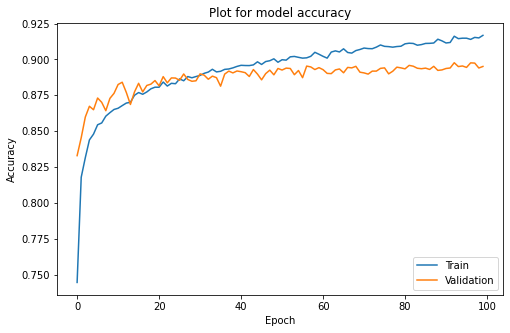

In [ ]:
# Plotting accuracy for different epochs
plt.figure(figsize= [8,5])
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Plot for model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

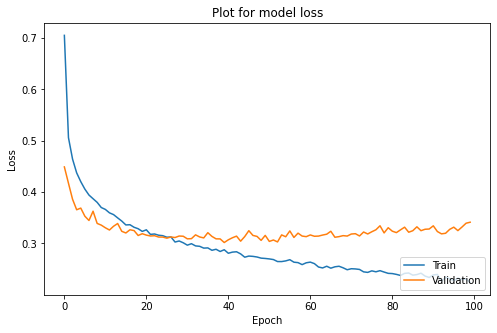

In [ ]:
# Plotting loss for different epochs
plt.figure(figsize= [8,5])
plt.plot(history_7.history['loss'])
plt.plot(history_7.history['val_loss'])
plt.title('Plot for model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [ ]:
# Final model parameters
model_7.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'name': 'dense_layer1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'batch_input_shape': (None, 784),
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_layer1',
    'trainable': True,
    'units': 392,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout_layer1',
    'noise_shape': None,
    'rate': 0.5,
    'seed': None,
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint